In [196]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [198]:
sales_df=pd.read_csv('store.csv')
sales_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [200]:
sample_submission_df=pd.read_csv('sample_submission.csv',low_memory=False)
store_df=pd.read_csv('store.csv')
test_df=pd.read_csv('test.csv')
train_df=pd.read_csv('train.csv')

In [201]:
sample_submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [202]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [206]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [208]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


# Merge the data frame 

In [211]:
merged_df=train_df.merge(store_df,how='left',on='Store')
merged_test_df=test_df.merge(store_df,how='left',on='Store')

In [213]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [215]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [217]:
# info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

# Find the missing value present in the merged_df 

In [220]:
merged_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [222]:
merged_df.describe().T.style.bar(subset='mean',color='Grey')\
.background_gradient(subset='std',cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
Store,1017209.000000,558.429727,321.908651,1.000000,280.000000,558.000000,838.000000,1115.000000
DayOfWeek,1017209.000000,3.998341,1.997391,1.000000,2.000000,4.000000,6.000000,7.000000
Sales,1017209.000000,5773.818972,3849.926175,0.000000,3727.000000,5744.000000,7856.000000,41551.000000
Customers,1017209.000000,633.145946,464.411734,0.000000,405.000000,609.000000,837.000000,7388.000000
Open,1017209.000000,0.830107,0.375539,0.000000,1.000000,1.000000,1.000000,1.000000
Promo,1017209.000000,0.381515,0.485759,0.000000,0.000000,0.000000,1.000000,1.000000
SchoolHoliday,1017209.000000,0.178647,0.383056,0.000000,0.000000,0.000000,0.000000,1.000000
CompetitionDistance,1014567.000000,5430.085652,7715.323700,20.000000,710.000000,2330.000000,6890.000000,75860.000000
CompetitionOpenSinceMonth,693861.000000,7.222866,3.211832,1.000000,4.000000,8.000000,10.000000,12.000000
CompetitionOpenSinceYear,693861.000000,2008.690228,5.992644,1900.000000,2006.000000,2010.000000,2013.000000,2015.000000


# Task-1

Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [226]:
train_promo_counts=merged_df['Promo'].value_counts()
test_promo_counts=merged_test_df['Promo'].value_counts()
train_promo_percentage=train_promo_counts/len(merged_df)
test_promo_percentage=test_promo_counts/len(merged_test_df)
print(f'Total percentage of promo in train data frame is : {train_promo_percentage}')
print(f'Total percentage of promo in test data frame is : {test_promo_percentage}')

Total percentage of promo in train data frame is : Promo
0    0.618485
1    0.381515
Name: count, dtype: float64
Total percentage of promo in test data frame is : Promo
0    0.604167
1    0.395833
Name: count, dtype: float64


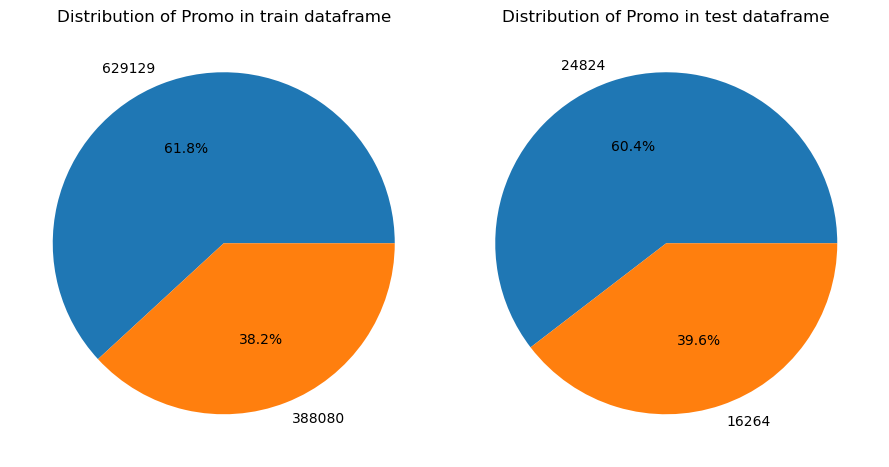

In [228]:
fig,axes=plt.subplots(1,2,figsize=(9,5))
axes[0].pie(train_promo_counts,labels=train_promo_counts,autopct='%1.1f%%')
axes[0].set_title('Distribution of Promo in train dataframe')
axes[1].pie(test_promo_counts,labels=test_promo_counts,autopct='%1.1f%%')
axes[1].set_title('Distribution of Promo in test dataframe')
plt.tight_layout()
plt.show()

Distribution of promo in test data frame value is similar to distribution of promo value in train data frame

Check & compare sales behavior before, during and after holidays

In [232]:
stateholiday_value_counts=merged_df['StateHoliday'].value_counts()
schoolholiday_value_counts=merged_df['SchoolHoliday'].value_counts()
# Convert 'Date' column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Identify holidays and the day before and after each holiday
holiday_dates = merged_df[merged_df['StateHoliday'].isin(['a', 'b', 'c'])]['Date']
previous_day_holidays = holiday_dates - pd.Timedelta(days=1)
next_day_holidays = holiday_dates + pd.Timedelta(days=1)

# Filter rows for the day before and after holiday
previous_day_sales = merged_df[merged_df['Date'].isin(previous_day_holidays) & ~merged_df['Date'].isin(holiday_dates)]['Sales']
next_day_sales = merged_df[merged_df['Date'].isin(next_day_holidays) & ~merged_df['Date'].isin(holiday_dates)]['Sales']

# Calculate average sale for the day before and after holiday
avg_sale_before_holiday = previous_day_sales.mean()
avg_sale_after_holiday = next_day_sales.mean()

# Filter rows for holidays
holiday_sales = merged_df[merged_df['Date'].isin(holiday_dates)]['Sales']
# Calculate average sale during holidays
avg_sale_during_holidays = holiday_sales.mean()

print("Average Sale Before Holiday:", avg_sale_before_holiday)
print("Average Sale During Holidays:", avg_sale_during_holidays)
print("Average Sale After Holiday:", avg_sale_after_holiday)

Average Sale Before Holiday: 5916.391316848763
Average Sale During Holidays: 1768.6530591925125
Average Sale After Holiday: 7438.113818433819


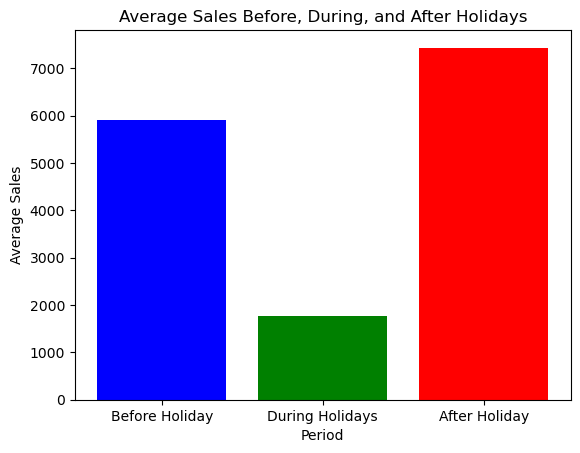

In [233]:
# Plotting
labels = ['Before Holiday', 'During Holidays', 'After Holiday']
avg_sales = [avg_sale_before_holiday, avg_sale_during_holidays, avg_sale_after_holiday]

plt.bar(labels, avg_sales, color=['blue', 'green', 'red'])
plt.title('Average Sales Before, During, and After Holidays')
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.show()

# Sales typically decline during holidays compared to the days surrounding them. Furthermore, sales significantly rise after holidays compared to the period before."

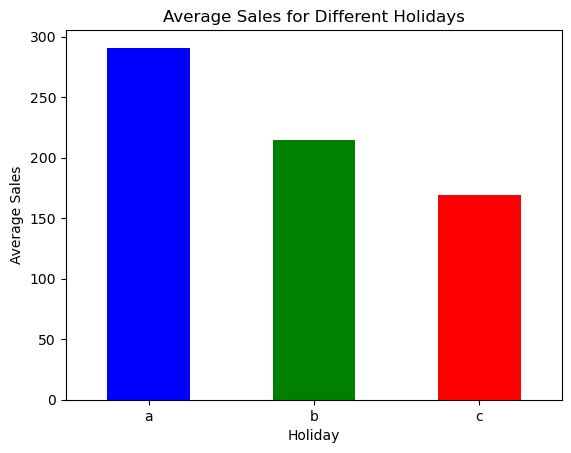

In [237]:
# Filter out 'None' category
filtered_train_df = merged_df[merged_df['StateHoliday'] != '0']

# Calculate average sale for each holiday
avg_sales_per_holiday = filtered_train_df[filtered_train_df['Date'].isin(holiday_dates)].groupby('StateHoliday')['Sales'].mean()

# Plotting
avg_sales_per_holiday.plot(kind='bar', color=['Blue','Green','Red'])
plt.title('Average Sales for Different Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

Here a = public holiday, b = Easter holiday, c = Christmas, 0 = None

As per the above visualization , during the holidays the mean sale of public holiday is high as compared to easter holiday and Christmas

# What can you say about the correlation between sales and number of customers?

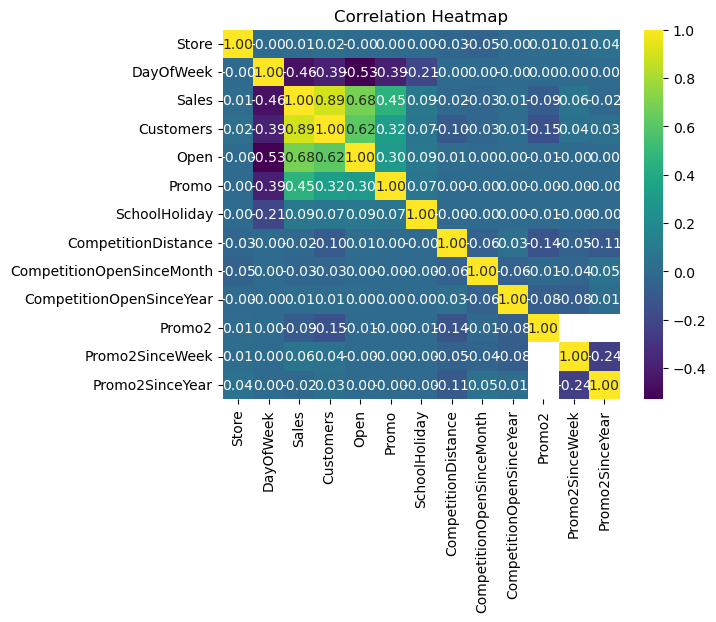

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation=merged_df['Sales'].corr(merged_df['Customers'])
numeric_df=merged_df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(),annot=True,cmap='viridis',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

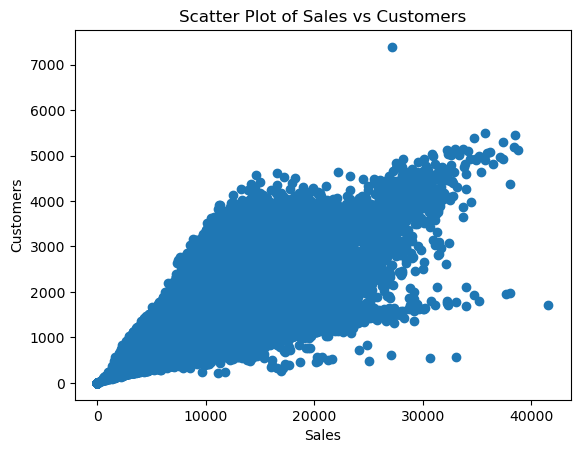

In [243]:
plt.scatter(merged_df['Sales'], merged_df['Customers'])
plt.xlabel('Sales')
plt.ylabel('Customers')
plt.title('Scatter Plot of Sales vs Customers')
plt.show()

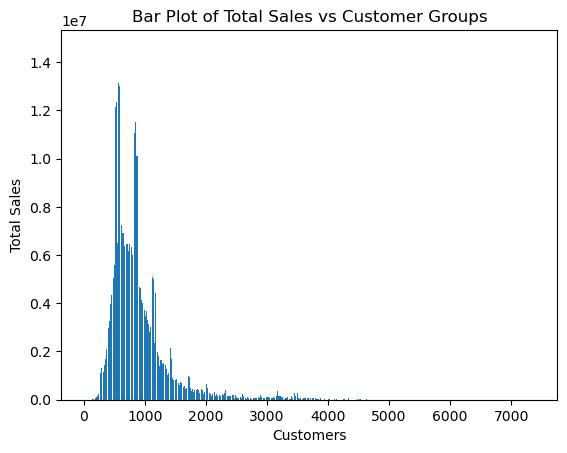

In [244]:
customer_groups = merged_df.groupby('Customers')['Sales'].sum()
plt.bar(customer_groups.index, customer_groups.values)
plt.xlabel('Customers')
plt.ylabel('Total Sales')
plt.title('Bar Plot of Total Sales vs Customer Groups')
plt.show()

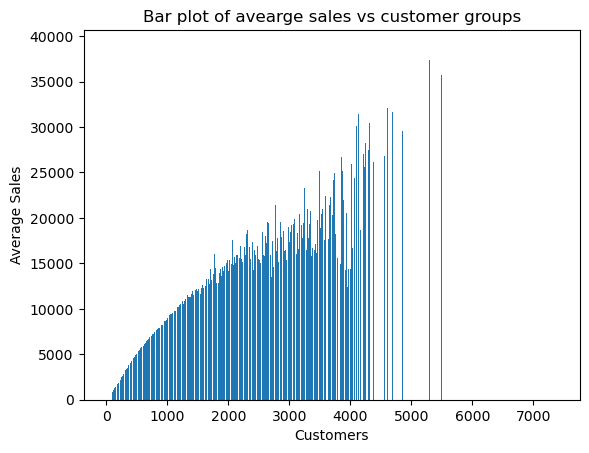

In [245]:
average_sales=merged_df.groupby('Customers')['Sales'].mean()
plt.bar(average_sales.index,average_sales.values)
plt.xlabel('Customers')
plt.ylabel('Average Sales')
plt.title('Bar plot of avearge sales vs customer groups')
plt.show()

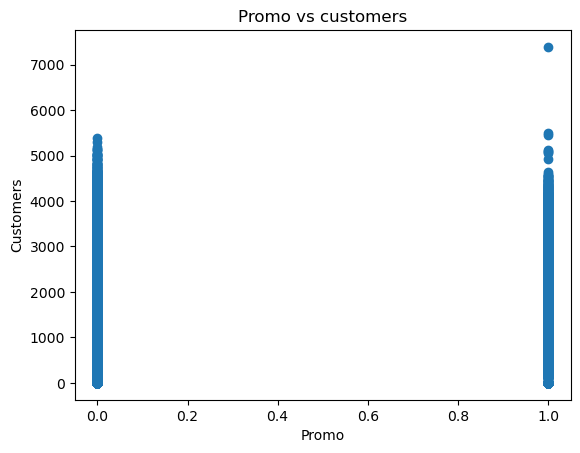

In [246]:
# Average sales on promo 
plt.scatter(merged_df['Promo'],merged_df['Customers'])
plt.xlabel('Promo')
plt.ylabel('Customers')
plt.title('Promo vs customers')
plt.show()

Through heatmaps and various scatter plots, a positive correlation is observed between Sales and the number of Customers, Store Openings, and Promotions. Sales are strongly linked to customer engagement.

In [248]:
# Correlation between Promo and Sales, and Promo and Customers
promo_sales_corr = merged_df[['Promo', 'Sales']].corr().iloc[0, 1]
promo_customers_corr = merged_df[['Promo', 'Customers']].corr().iloc[0, 1]

print("Correlation between Promo and Sales:", promo_sales_corr)
print("Correlation between Promo and Customers:", promo_customers_corr)

# Effect on Existing Customers - Calculating averages
promo_group = merged_df.groupby('Promo')[['Sales', 'Customers']].mean()

avg_sales_promo = promo_group.loc[1, 'Sales']
avg_sales_no_promo = promo_group.loc[0, 'Sales']

avg_customers_promo = promo_group.loc[1, 'Customers']
avg_customers_no_promo = promo_group.loc[0, 'Customers']

print("Average Sales during Promo:", avg_sales_promo)
print("Average Sales without Promo:", avg_sales_no_promo)

print("Average Customers during Promo:", avg_customers_promo)
print("Average Customers without Promo:", avg_customers_no_promo)


Correlation between Promo and Sales: 0.4523447198240434
Correlation between Promo and Customers: 0.31616947667426676
Average Sales during Promo: 7991.152045969903
Average Sales without Promo: 4406.050805160786
Average Customers during Promo: 820.0988146773861
Average Customers without Promo: 517.8235417537579


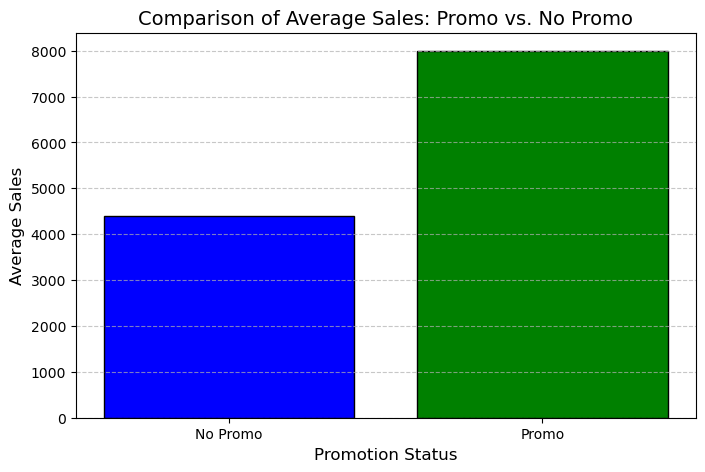

In [249]:
plt.figure(figsize=(8, 5))

plt.bar(['No Promo', 'Promo'], [avg_sales_no_promo, avg_sales_promo], 
        color=['Blue', 'Green'], edgecolor='black')

plt.title('Comparison of Average Sales: Promo vs. No Promo', fontsize=14)
plt.xlabel('Promotion Status', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for readability
plt.show()


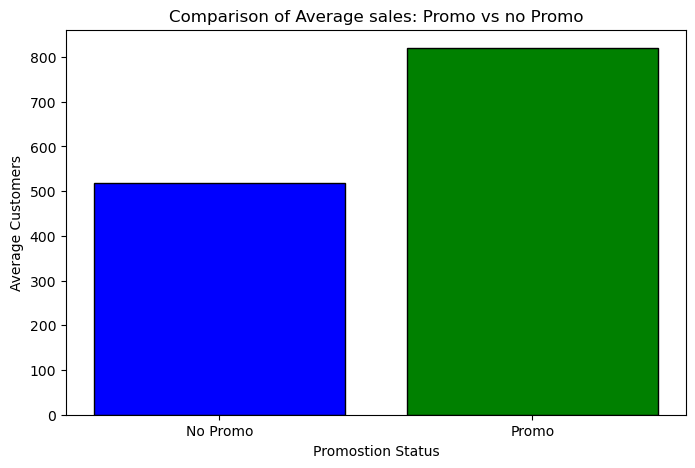

In [251]:
plt.figure(figsize=(8,5))
plt.bar(['No Promo','Promo'],[avg_customers_no_promo,avg_customers_promo],color=['Blue','Green'],edgecolor='black')
plt.xlabel('Promostion Status')
plt.ylabel('Average Customers')
plt.title('Comparison of Average sales: Promo vs no Promo')
plt.show()

Bar plot analysis clearly shows that promotions play a crucial role in attracting customers, which in turn drives higher sales.

Text(0, 0.5, 'Average Customers')

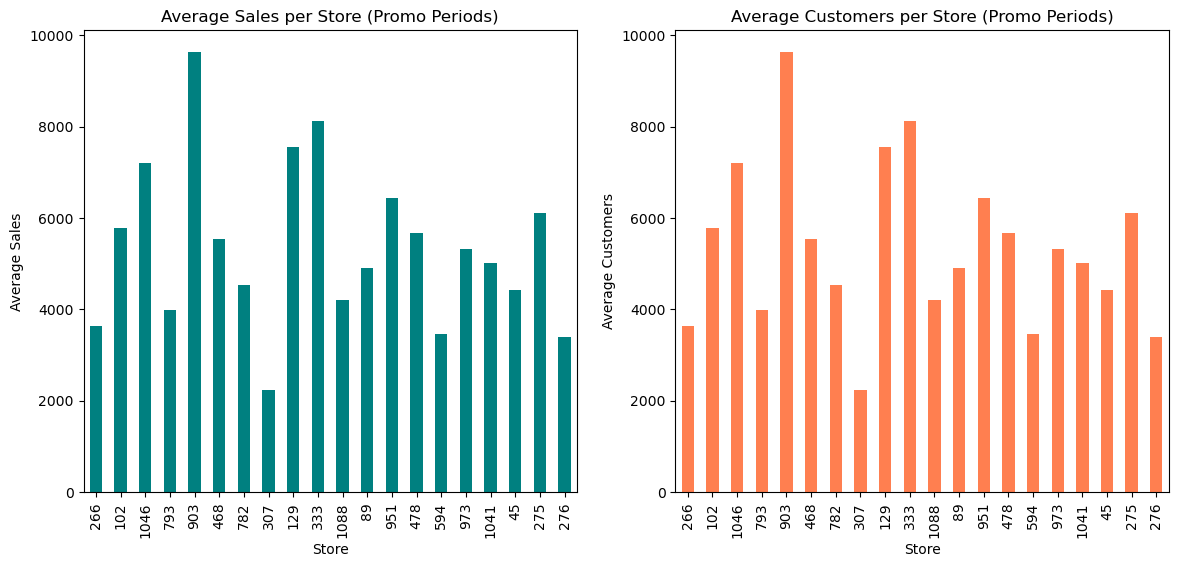

In [253]:
import numpy as np 
import random
avg_sales_per_store_promo=merged_df.groupby('Store')['Sales'].mean()
avg_customers_per_store_promo=merged_df.groupby('Store')['Sales'].mean()
np.random.seed(42)
selected_stores = np.random.choice(avg_sales_per_store_promo.index, size=20, replace=False)

# Filter data for the selected stores
avg_sales_subset = avg_sales_per_store_promo.loc[selected_stores]
avg_customers_subset = avg_customers_per_store_promo.loc[selected_stores]

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting average sales per store for the subset of stores
avg_sales_subset.plot(kind='bar', color='teal', ax=axes[0])
axes[0].set_title('Average Sales per Store (Promo Periods)')
axes[0].set_xlabel('Store')
axes[0].set_ylabel('Average Sales')

# Plotting average customers per store for the subset of stores
avg_customers_subset.plot(kind='bar', color='coral', ax=axes[1])
axes[1].set_title('Average Customers per Store (Promo Periods)')
axes[1].set_xlabel('Store')
axes[1].set_ylabel('Average Customers')

# Which stores are opened on all weekdays? How does that affect their sales on weekends? 

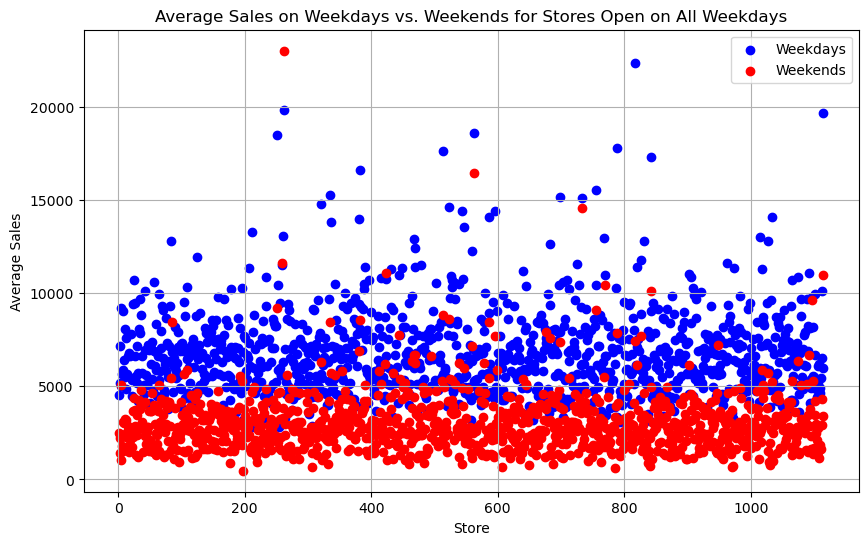

In [256]:
# Check if the store is open on all weekdays (Monday through Friday)
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
stores_open_on_weekdays = merged_df[(merged_df['Open'] == 1) & 
                                   (merged_df['DayOfWeek'].isin([1, 2, 3, 4, 5]))]['Store'].unique()

# Filter the dataframe for stores open on all weekdays
stores_open_on_weekdays_df = merged_df[merged_df['Store'].isin(stores_open_on_weekdays)]

# Group by Store and DayOfWeek to calculate average sales
avg_sales_by_store_and_day = stores_open_on_weekdays_df.groupby(['Store', 'DayOfWeek'])['Sales'].mean().reset_index()

# Calculate average sales on weekdays and weekends for each store
avg_sales_weekdays = avg_sales_by_store_and_day[avg_sales_by_store_and_day['DayOfWeek'].isin([1, 2, 3, 4, 5])].groupby('Store')['Sales'].mean()
avg_sales_weekends = avg_sales_by_store_and_day[avg_sales_by_store_and_day['DayOfWeek'].isin([6, 7])].groupby('Store')['Sales'].mean()

# Plotting the comparison of average sales on weekdays vs. weekends
plt.figure(figsize=(10, 6))
plt.scatter(avg_sales_weekdays.index, avg_sales_weekdays.values, color='blue', label='Weekdays')
plt.scatter(avg_sales_weekends.index, avg_sales_weekends.values, color='red', label='Weekends')
plt.title('Average Sales on Weekdays vs. Weekends for Stores Open on All Weekdays')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True)
plt.show()

"Upon reviewing the scatter plot, a clear trend is observed: most stores see higher sales during weekdays compared to weekends, though there are exceptions where certain stores perform better on weekends."

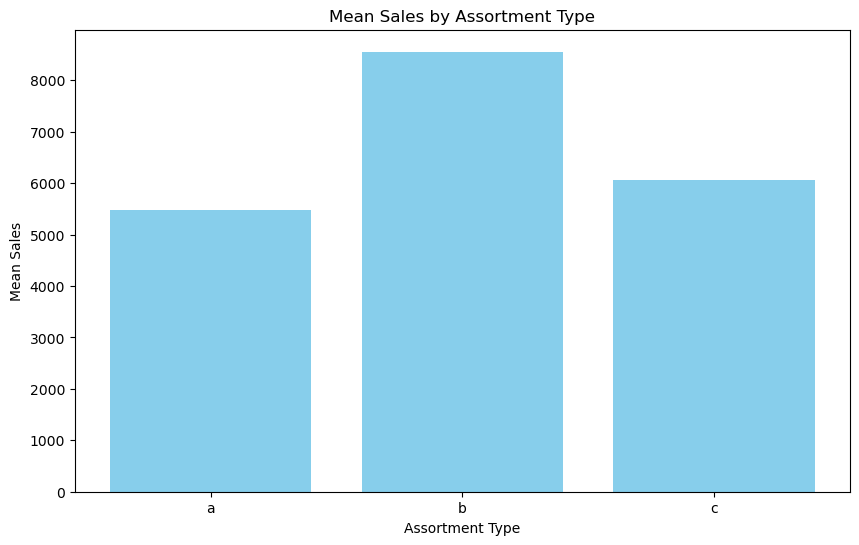

In [258]:
# Group the data by assortment type and calculate the mean sales for each assortment type
assortment_sales = merged_df.groupby('Assortment')['Sales'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(assortment_sales['Assortment'], assortment_sales['Sales'], color='skyblue')
plt.title('Mean Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Mean Sales')
plt.show()

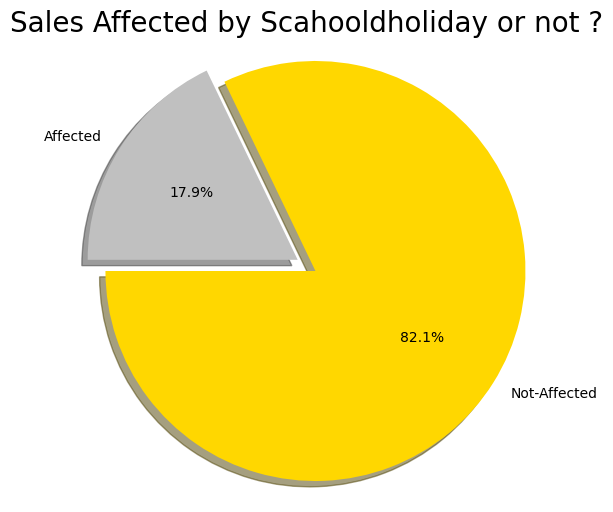

In [260]:
labels='Not-Affected','Affected'
sizes=merged_df.SchoolHoliday.value_counts()
colors=['gold','silver']
explode=(0.1,0.0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=180)
plt.axis('equal')
plt.title('Sales Affected by Scahooldholiday or not ?',fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

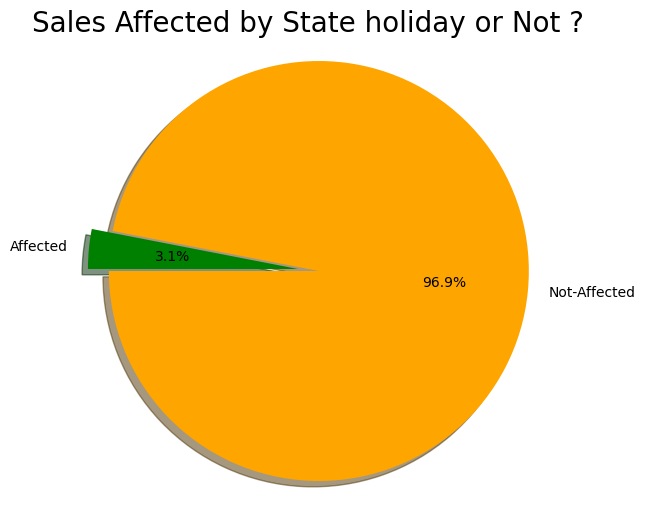

In [262]:
merged_df["StateHoliday"] = merged_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
labels = 'Not-Affected' , 'Affected'
sizes = merged_df.StateHoliday.value_counts()
colors = ['orange','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

As Sales isn't much affected by State Holiday so i'm removing this column

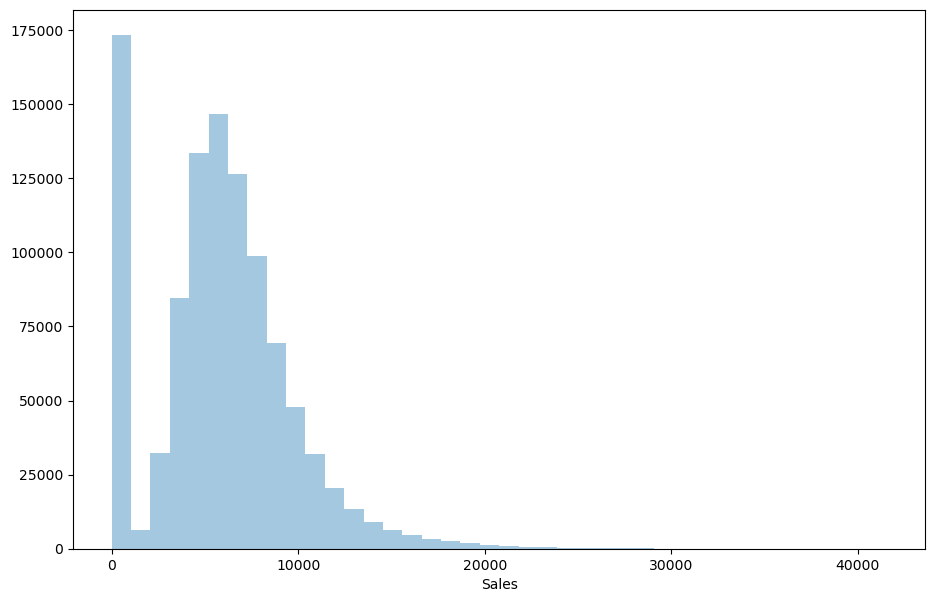

In [278]:
merged_df.drop('StateHoliday',inplace=True,axis=1)
#Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(merged_df['Sales'], kde = False,bins=40);

# Sales vs Customers

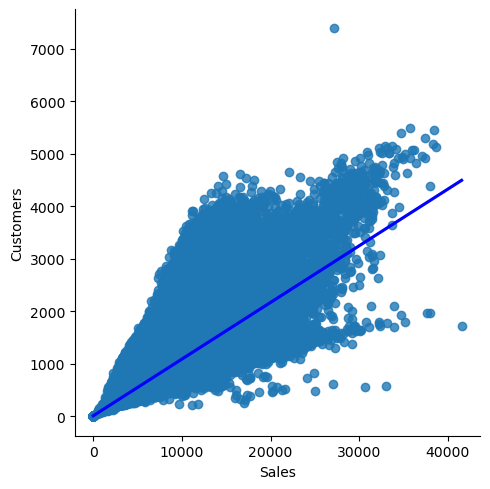

In [288]:
# Linear relation between sales and custoners
sns.lmplot(x='Sales',y='Customers',data=merged_df,
          palette='seismic',height=5,aspect=1,line_kws={'color':'blue'})

# Heatmap for null value

<Axes: >

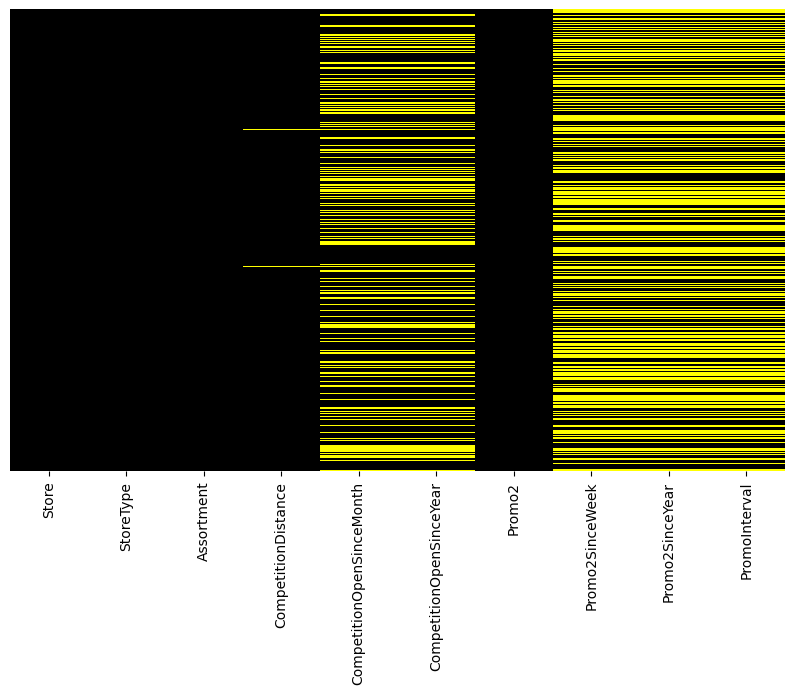

In [291]:
# creating heatmap for the null values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels=False,cbar=False,cmap='gnuplot')

# Distribution of Different Store Type

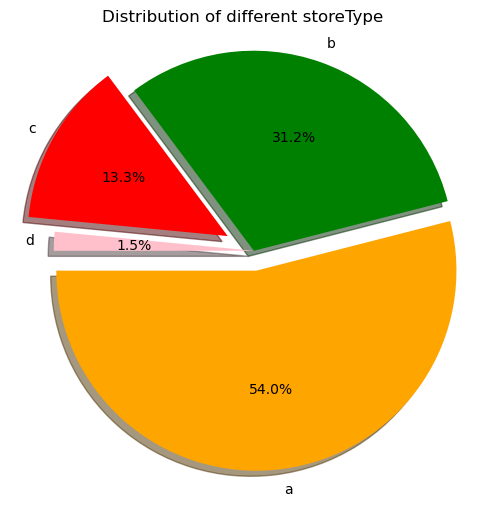

In [298]:
labels='a','b','c','d'
sizes=store_df.StoreType.value_counts()
colors=['orange','green','red','pink']
explode=(0.1,0.0,0.15,0.0)
plt.pie(sizes,explode=explode,labels=labels,
       colors=colors,autopct='%1.1f%%',shadow=True,startangle=180)
plt.axis('equal')
plt.title('Distribution of different storeType')
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

# Remove features with high percentage of missing values

we can see that features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with mode than 30% missing values

In [304]:
	
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

# Replace missing values in features with low percentages of missing values

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

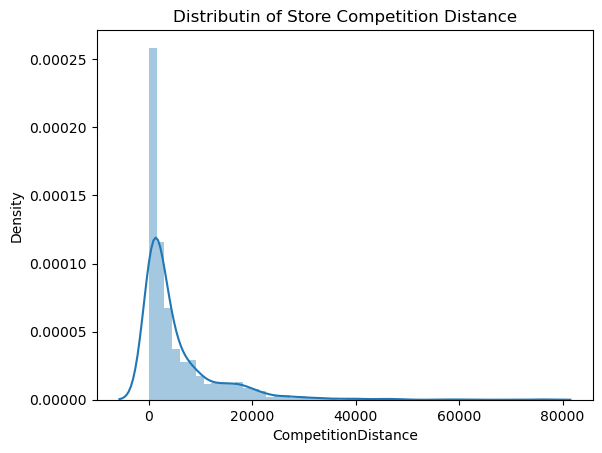

In [307]:
	
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

# This distribution is high skewws,so we will replace missing values with median

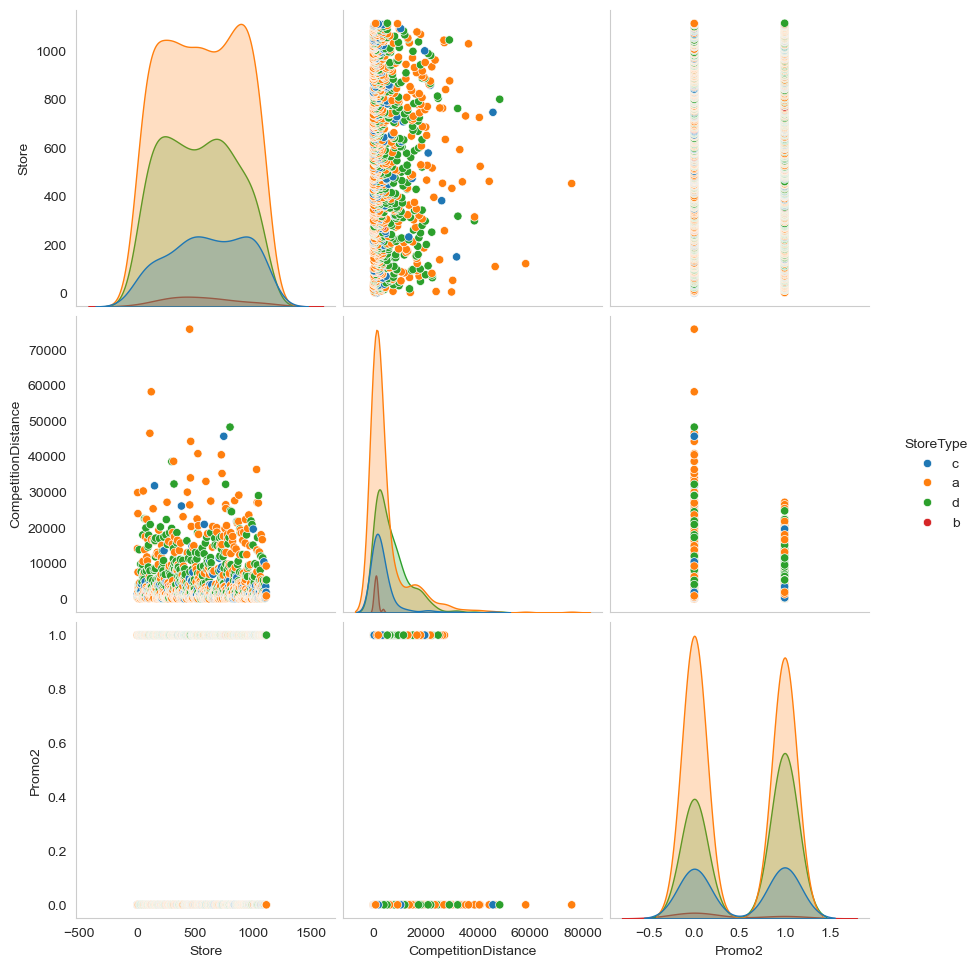

In [312]:
store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(),inplace=True)
# pair plot for store Dataset
sns.set_style('whitegrid',{'axes.grid':False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10)

# Checking store with their assortment type

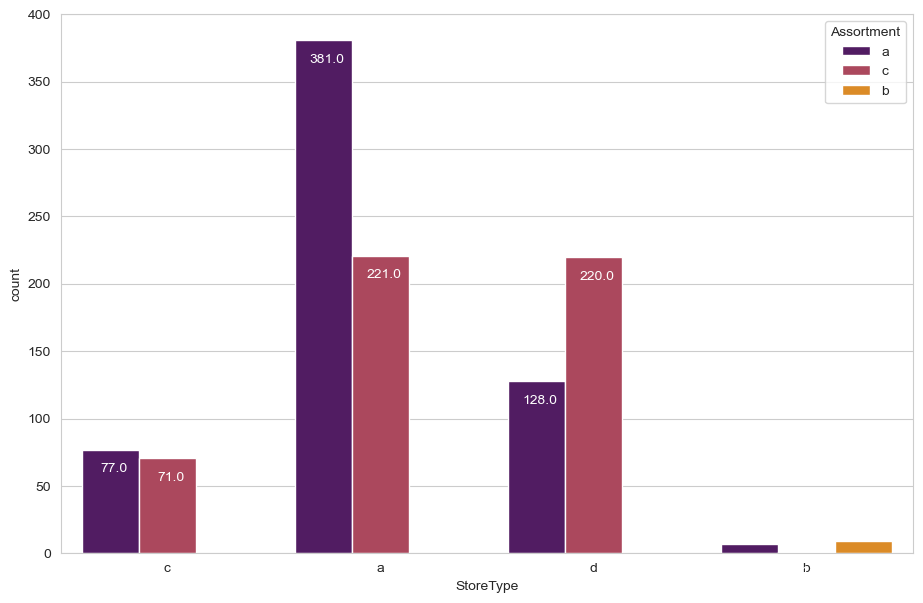

In [319]:
#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

# we can see that there is not such significant diffferneces in these 3 years in terms of sales

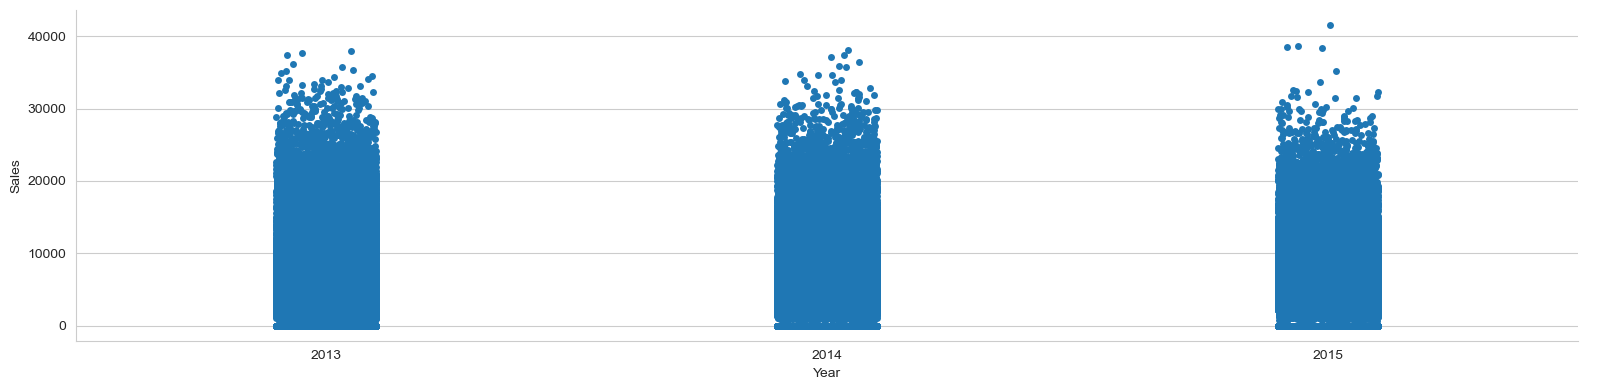

In [336]:
#plotting year vs sales
merged_df['Date']=pd.to_datetime(merged_df['Date'])
merged_df['Year']=merged_df['Date'].apply(lambda x:x.year)
merged_df['Month']=merged_df['Date'].apply(lambda x:x.month)
merged_df['Day']=merged_df['Date'].apply(lambda x:x.day)
merged_df['WeekOfYear']=merged_df['Date'].apply(lambda x:x.weekofyear)
sns.catplot(x='Year',y='Sales',data=merged_df, height=4, aspect=4 );

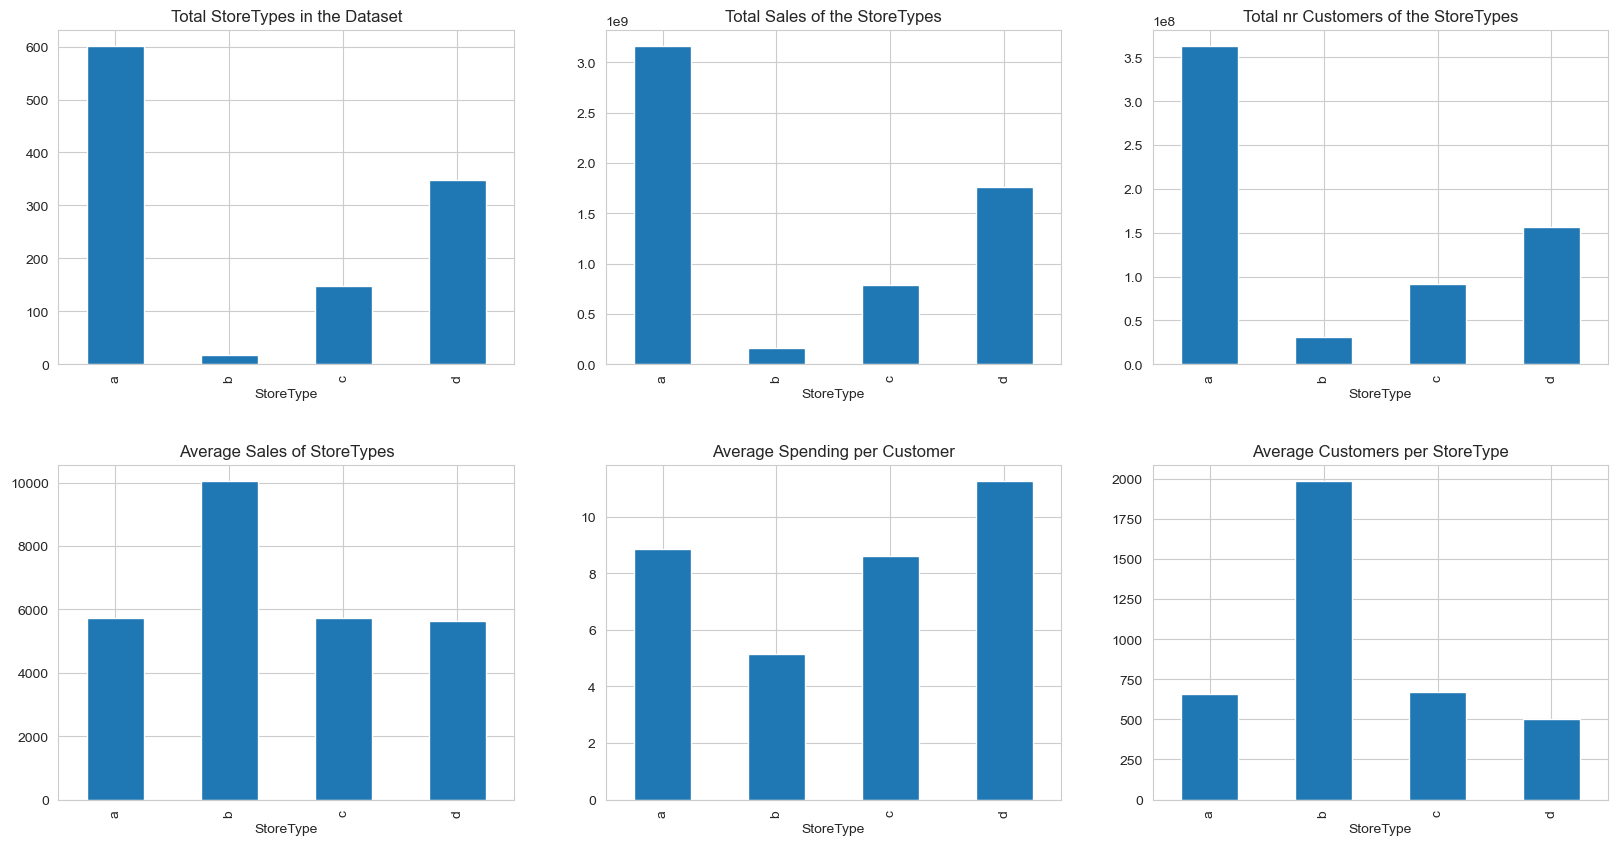

In [348]:
merged_df['Avg_Customer_Sales']=merged_df.Sales/merged_df.Customers
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
merged_df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
merged_df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
merged_df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
merged_df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
merged_df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

As we can see from the graps,the StoreType A has the moststores,sales and customers. However the Store D has the best averages spending per customers.StoreType B , with only 17 stores has the most average customers.

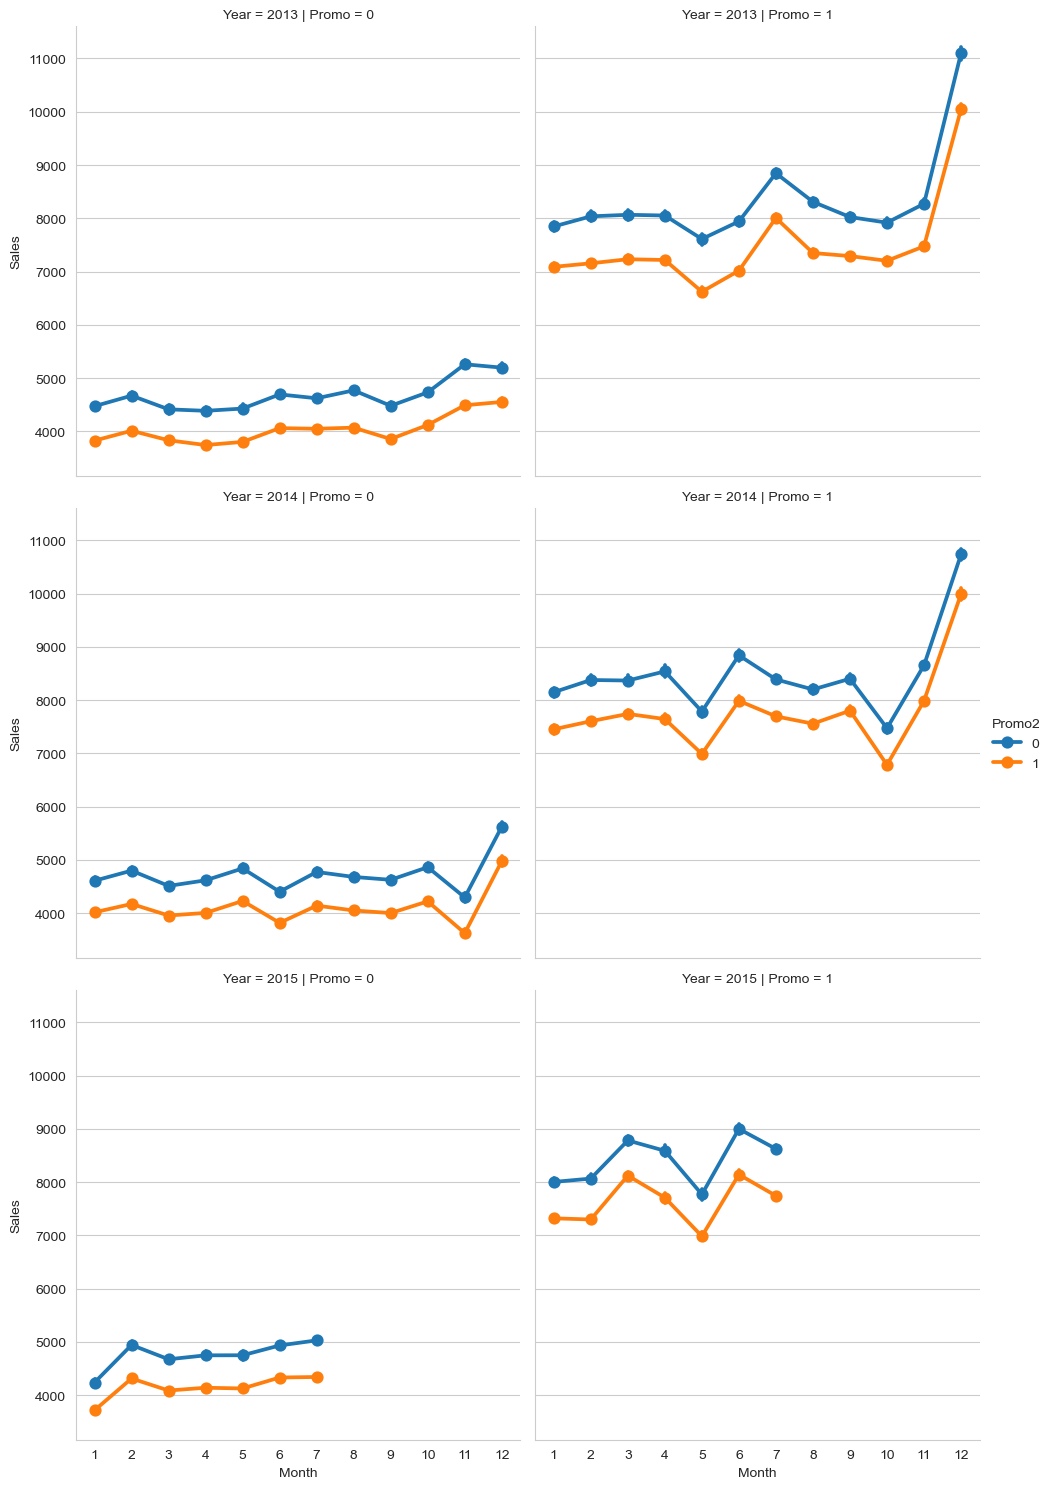

In [357]:
sns.catplot(data=merged_df, x="Month", y="Sales", 
            col='Promo',    # per store type in cols
            hue='Promo2',
            row="Year", 
            kind="point")    # or 'bar', 'strip', 'swarm', etc., depending on the visualization you want


# As we can see that when the promo is running sales are high 

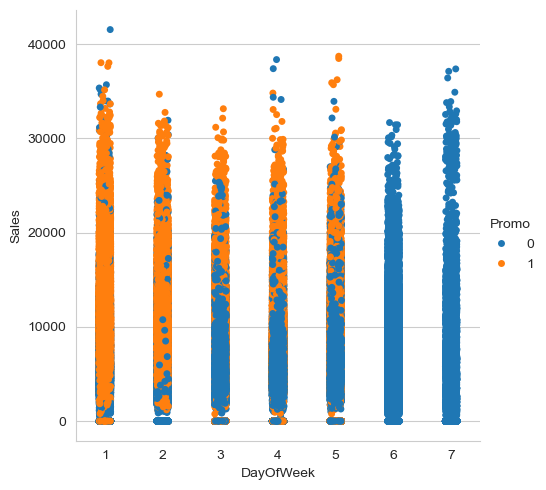

In [360]:
sns.catplot(data=merged_df,x='DayOfWeek',y='Sales',hue="Promo")

# Trands on the weekly basis

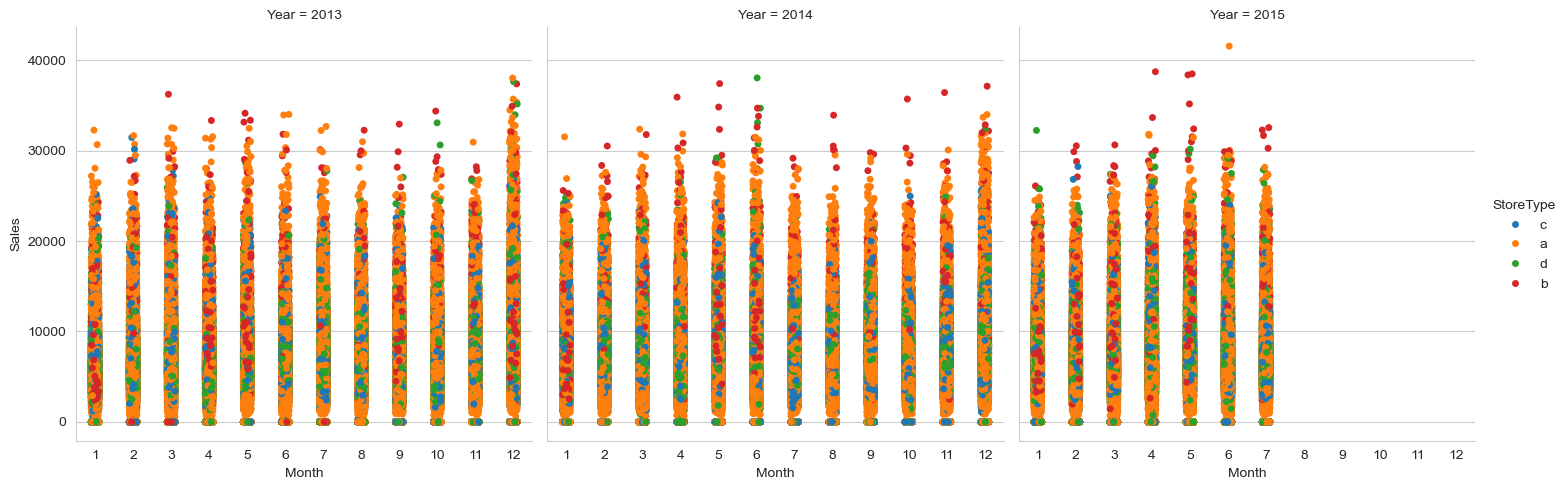

In [363]:
sns.catplot(data=merged_df,x='Month',y='Sales',col='Year',hue='StoreType')

# we can see a seasonalties,nut not trends. The sales stays constantly yearly

<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

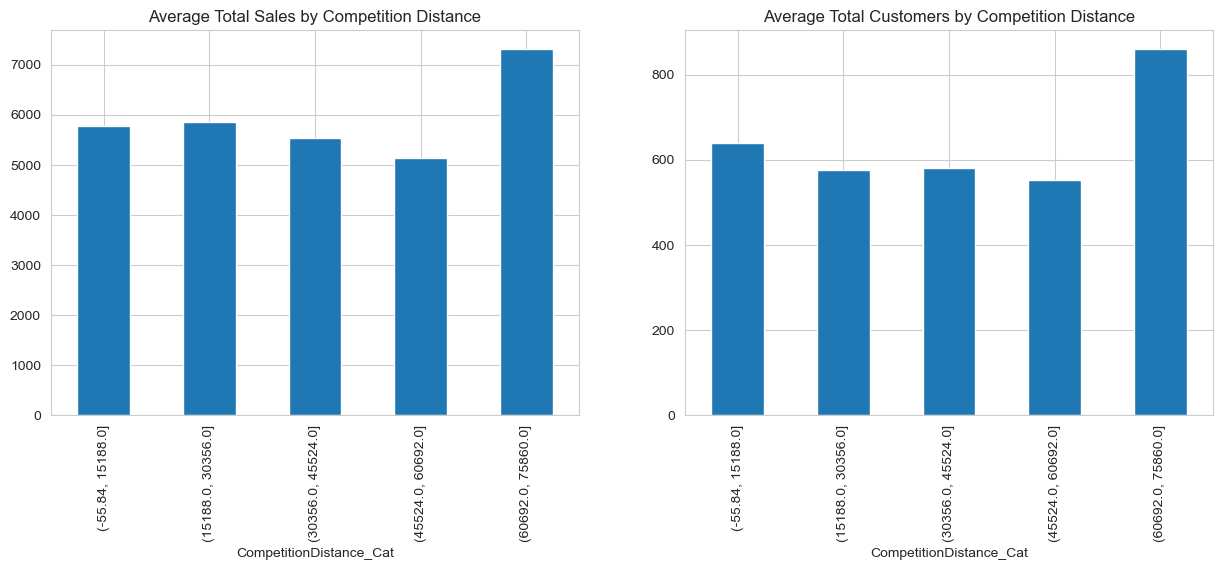

In [378]:
merged_df.CompetitionDistance.describe()
merged_df["CompetitionDistance_Cat"] = pd.cut(merged_df["CompetitionDistance"], 5)
f, ax = plt.subplots(1,2, figsize = (15,5))

merged_df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
merged_df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])


# Boxplot shows the outliers 

<Axes: ylabel='Sales'>

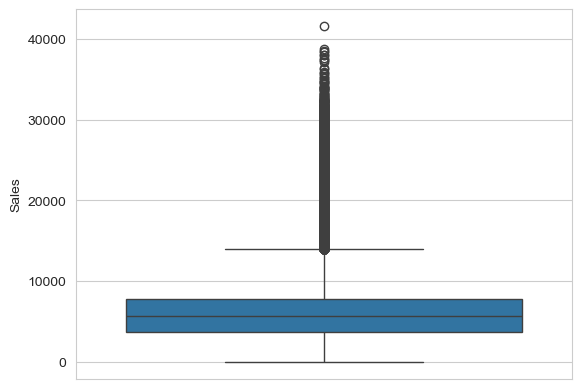

In [385]:
sns.boxplot(merged_df['Sales'])

# conclusion of analysis